In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, mannwhitneyu
from lifelines import KaplanMeierFitter
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("HR Analytics.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df["EmployeeNumber"].unique

<bound method Series.unique of 0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [ ]:
numerical_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

In [ ]:
for col in categorical_cols:
    print(df[col].value_counts())
    print('-----------------------------------')

Attrition
No     1233
Yes     237
Name: count, dtype: int64
-----------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
-----------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
-----------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
-----------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
-----------------------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director            

ValueError: num must be an integer with 1 <= num <= 25, not 26

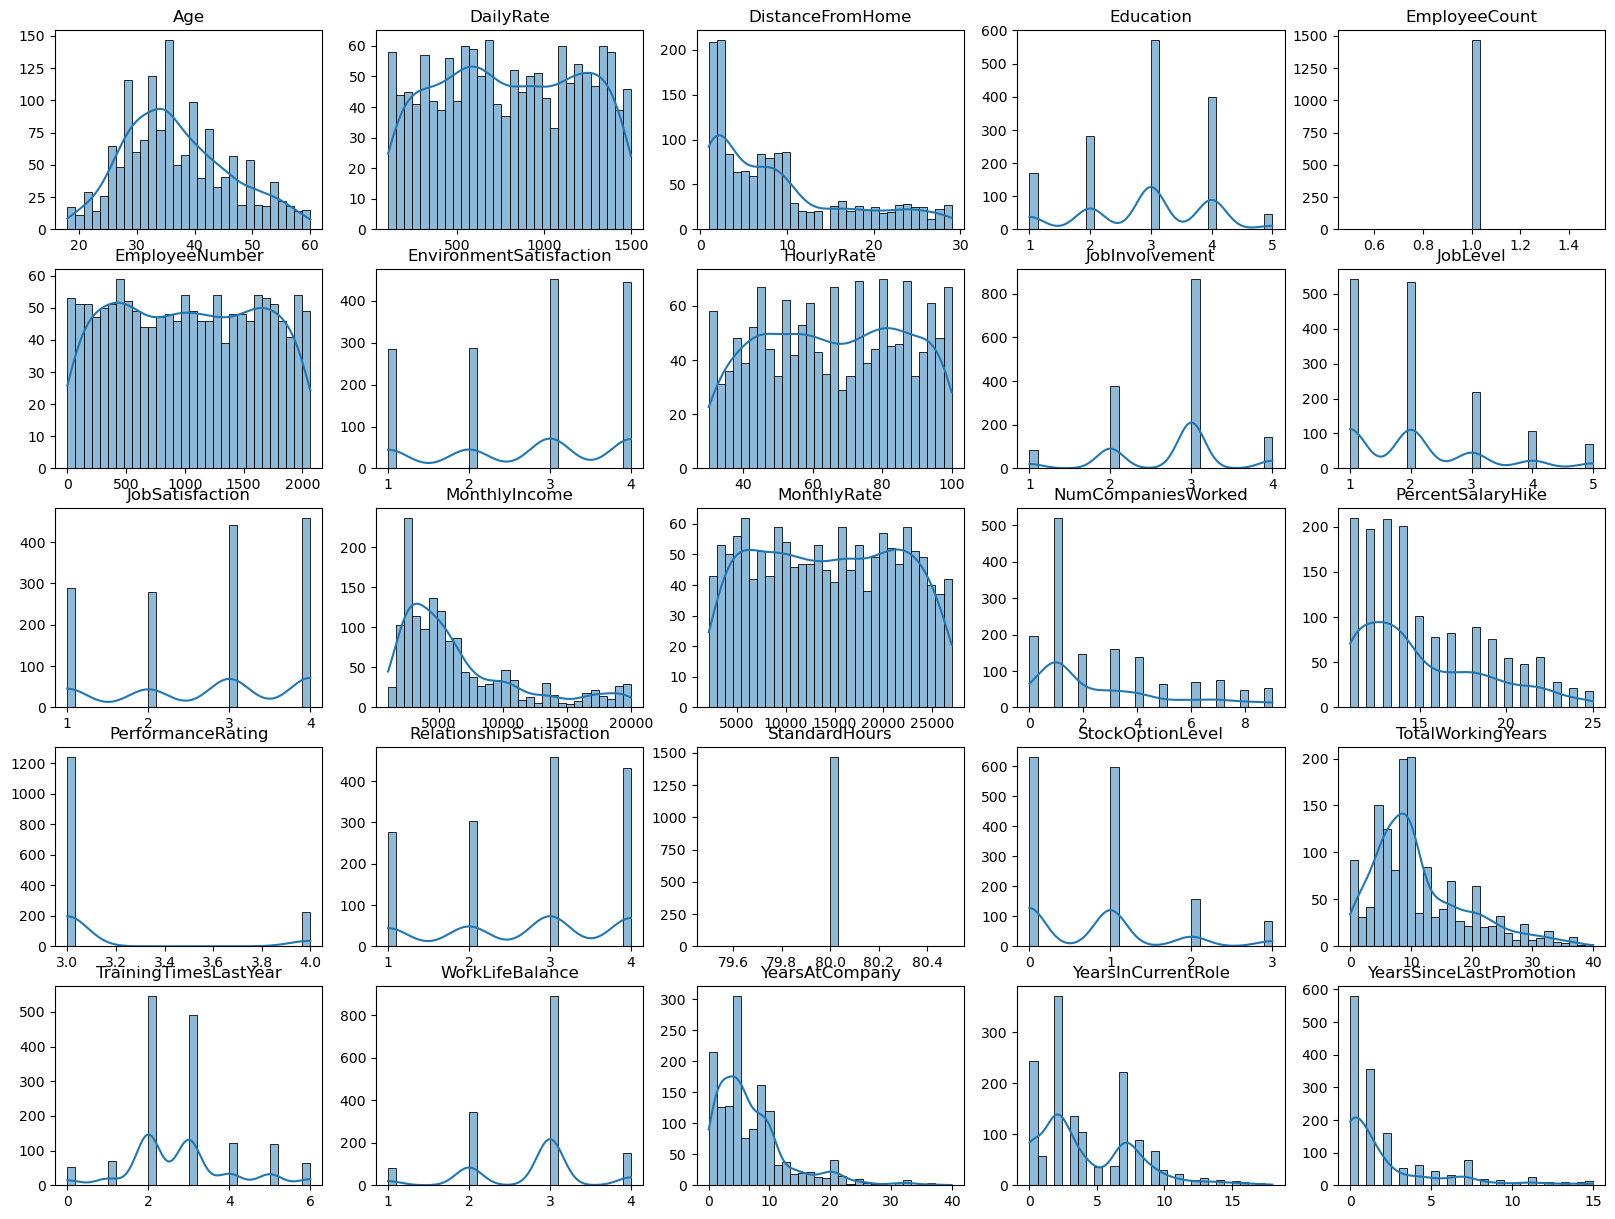

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)  # Adjust grid size based on number of columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()

In [ ]:
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: num must be an integer with 1 <= num <= 25, not 26

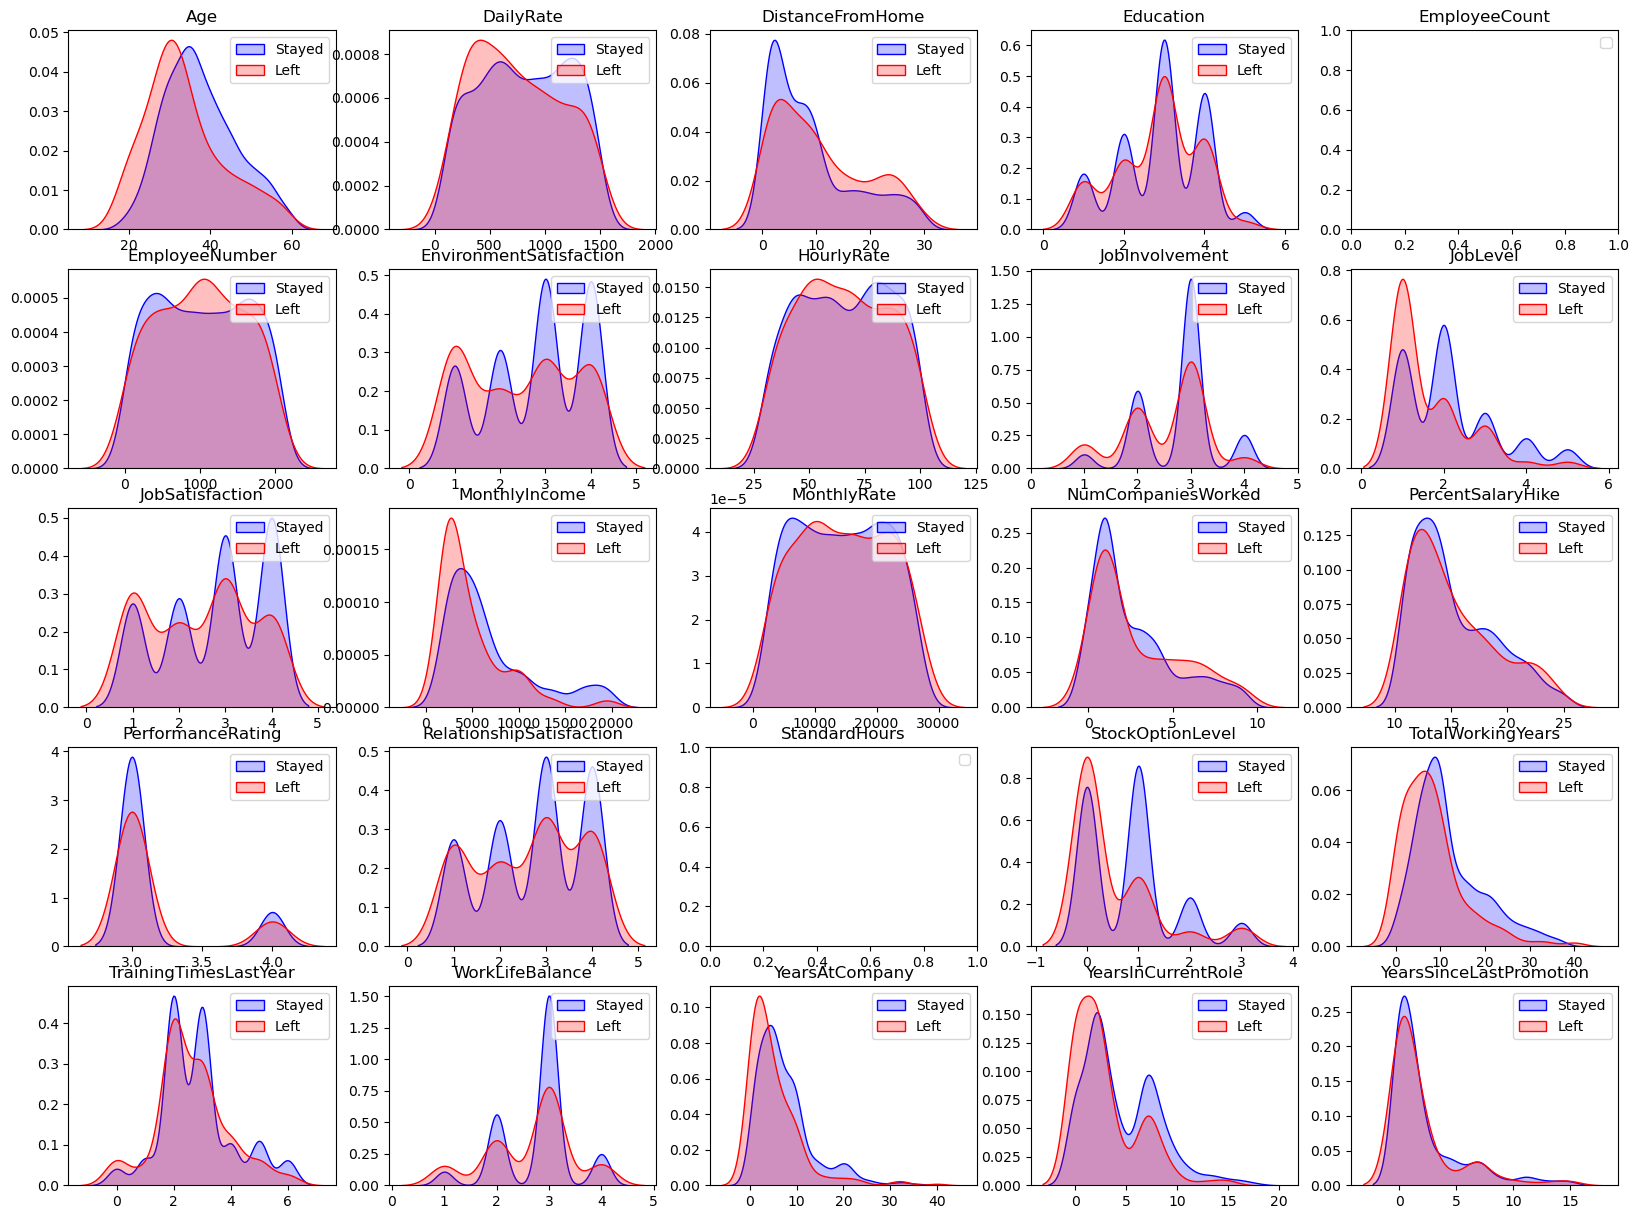

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(df[df['Attrition'] == 0][col], label="Stayed", shade=True, color="blue")
    sns.kdeplot(df[df['Attrition'] == 1][col], label="Left", shade=True, color="red")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
    plt.legend()
plt.tight_layout()
plt.show()

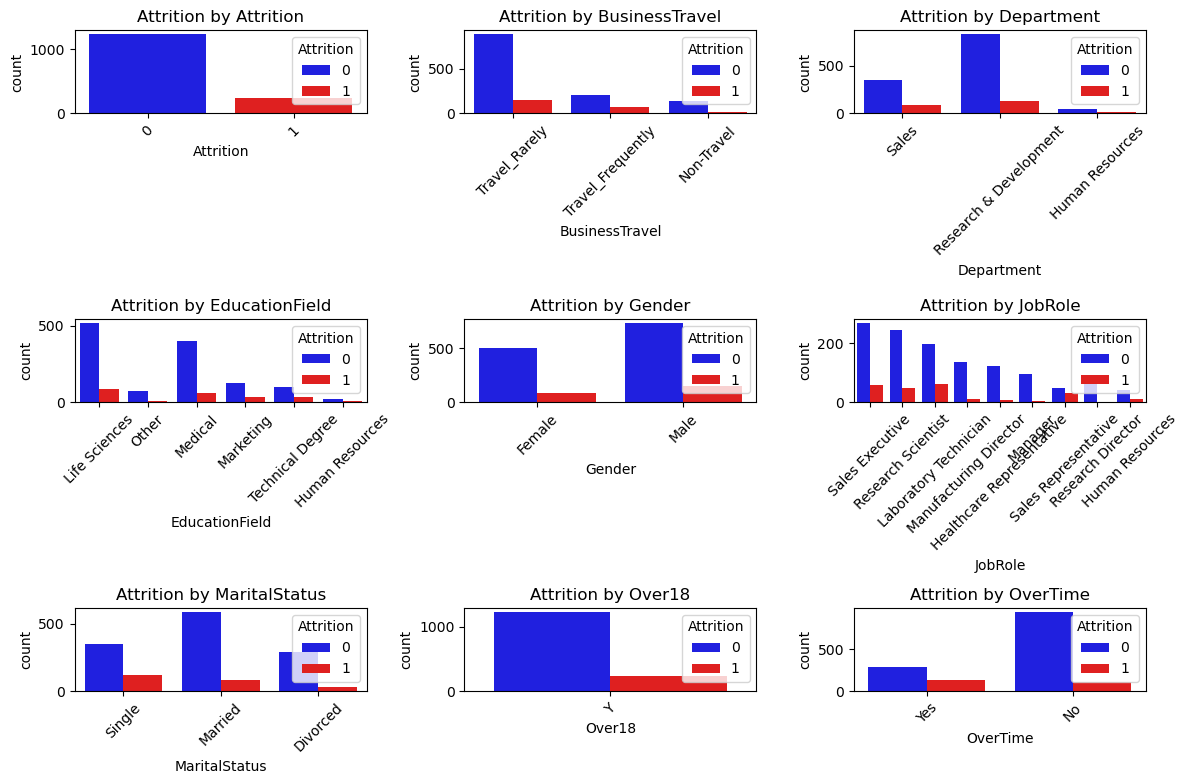

In [ ]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust based on the number of categorical variables
    sns.countplot(x=col, hue="Attrition", data=df, palette=["blue", "red"])
    plt.title(f"Attrition by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

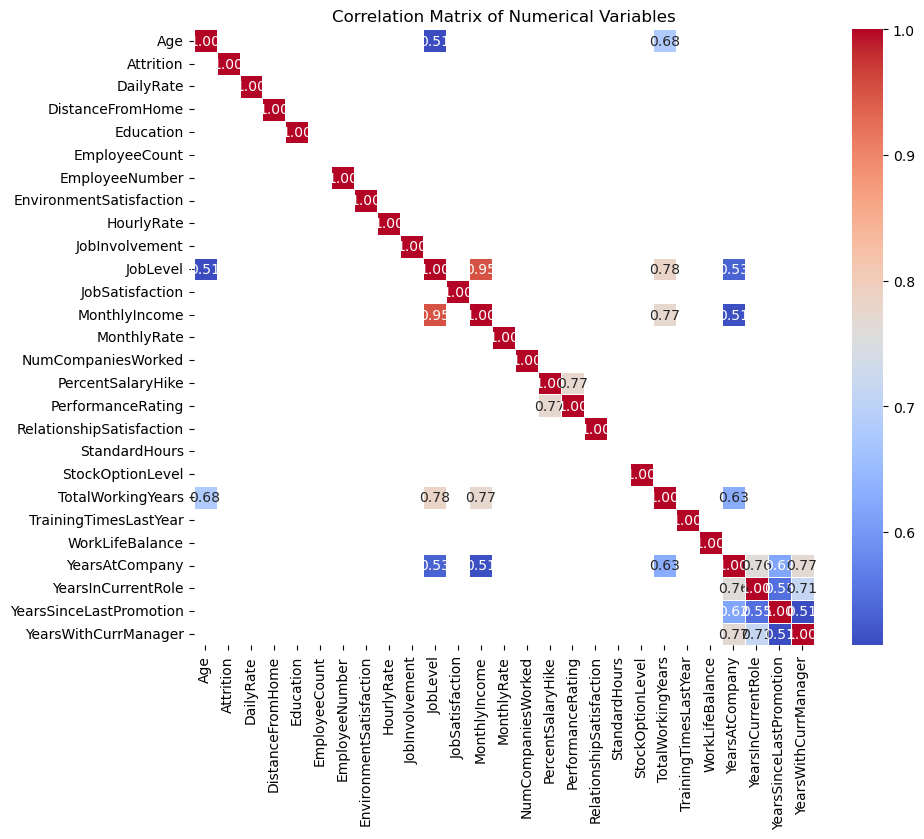

In [ ]:
# computing the correlation matrix for numerical variables
corr_matrix = df[numerical_cols].corr()
mask = np.abs(corr_matrix) < 0.5
corr_matrix[mask] = np.nan

# plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [ ]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Get absolute correlations and filter those above 0.5 (excluding self-correlations)
high_corr = corr_matrix.abs().unstack().reset_index()
high_corr.columns = ["Variable 1", "Variable 2", "Correlation"]
high_corr = high_corr[high_corr["Variable 1"] != high_corr["Variable 2"]]  # Remove self-correlations
high_corr = high_corr[high_corr["Correlation"] > 0.5].sort_values(by="Correlation", ascending=False)

# Drop duplicate pairs (e.g., A-B and B-A)
high_corr = high_corr.iloc[::2].reset_index(drop=True)

# Display
print(high_corr)

                 Variable 1               Variable 2  Correlation
0                  JobLevel            MonthlyIncome     0.950300
1         TotalWorkingYears                 JobLevel     0.782208
2         PerformanceRating        PercentSalaryHike     0.773550
3             MonthlyIncome        TotalWorkingYears     0.772893
4      YearsWithCurrManager           YearsAtCompany     0.769212
5        YearsInCurrentRole           YearsAtCompany     0.758754
6        YearsInCurrentRole     YearsWithCurrManager     0.714365
7         TotalWorkingYears                      Age     0.680381
8         TotalWorkingYears           YearsAtCompany     0.628133
9   YearsSinceLastPromotion           YearsAtCompany     0.618409
10       YearsInCurrentRole  YearsSinceLastPromotion     0.548056
11                 JobLevel           YearsAtCompany     0.534739
12           YearsAtCompany            MonthlyIncome     0.514285
13     YearsWithCurrManager  YearsSinceLastPromotion     0.510224
14        

Overall Attrition Rate: 16.12%


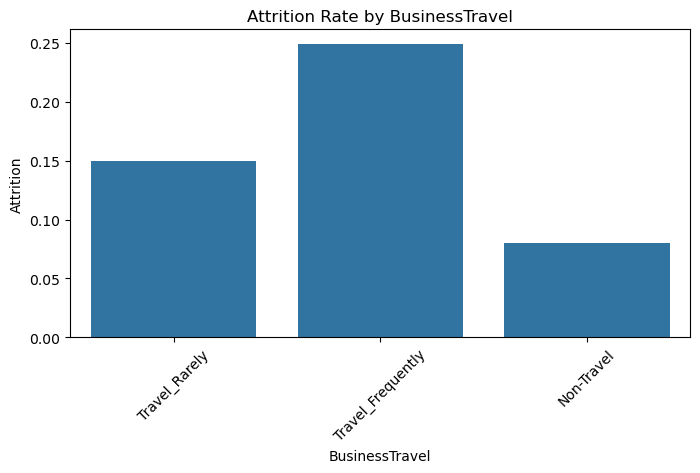

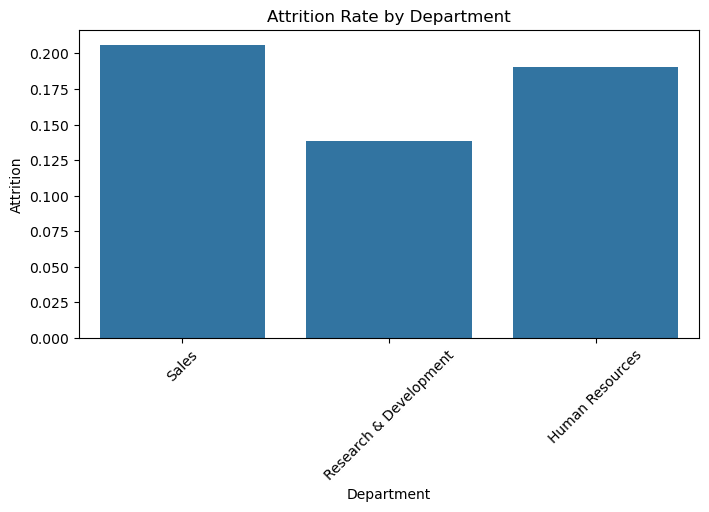

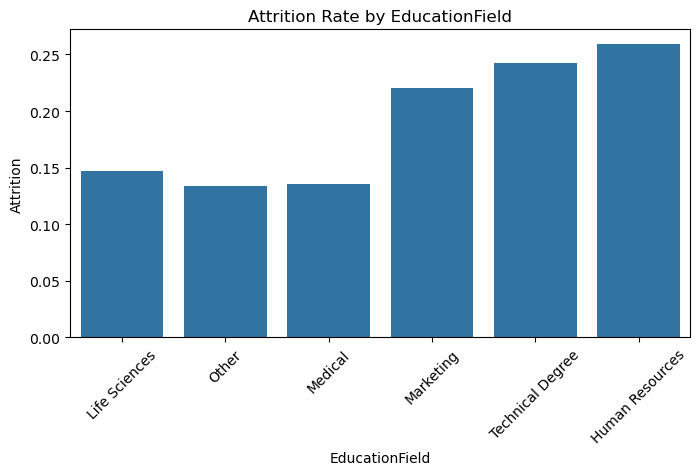

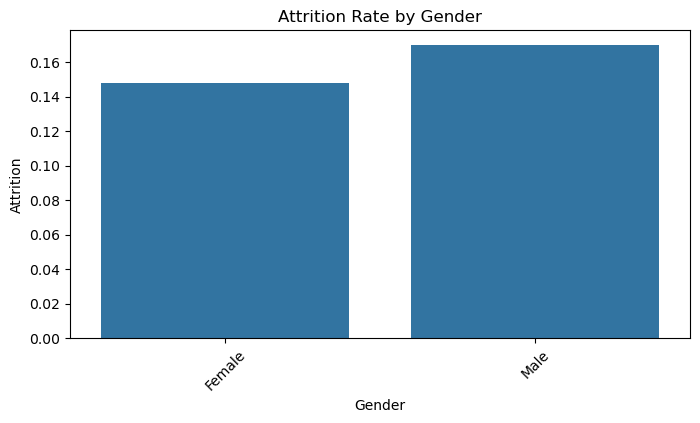

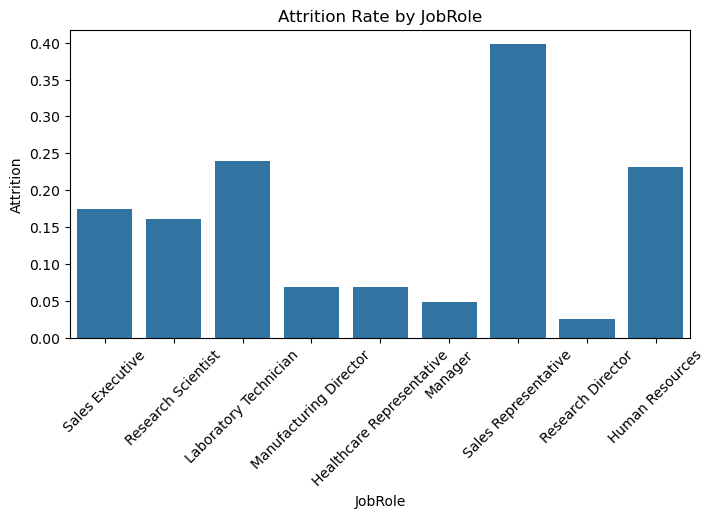

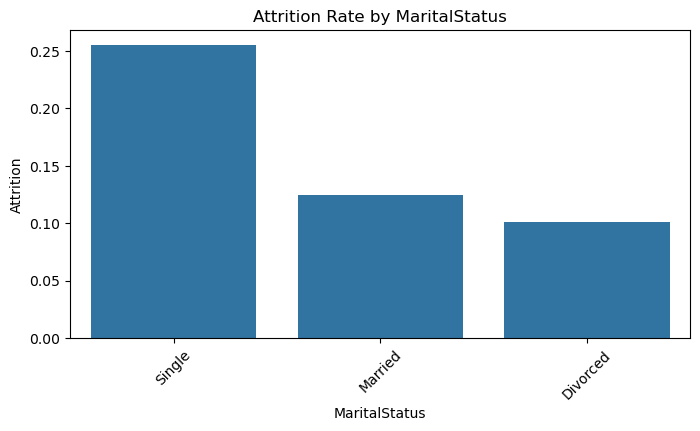

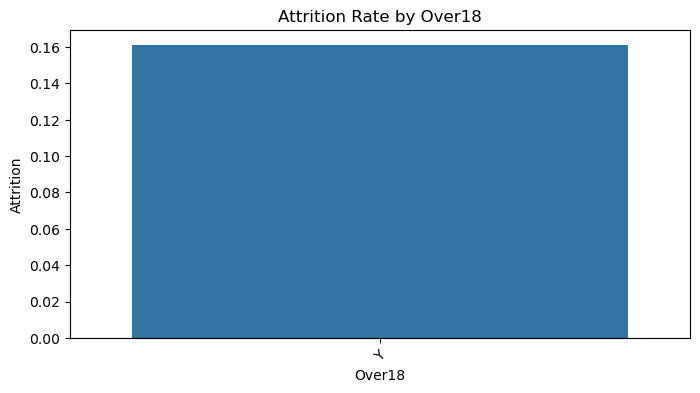

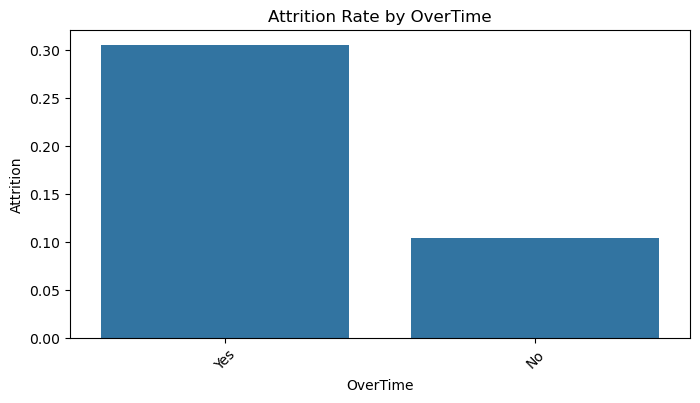

In [ ]:
# Attrition rate
attrition_rate = df['Attrition'].mean()
print(f"Overall Attrition Rate: {attrition_rate:.2%}")

for var in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=var, y="Attrition", data=df, ci=None)
    plt.xticks(rotation=45)
    plt.title(f"Attrition Rate by {var}")
    plt.show()

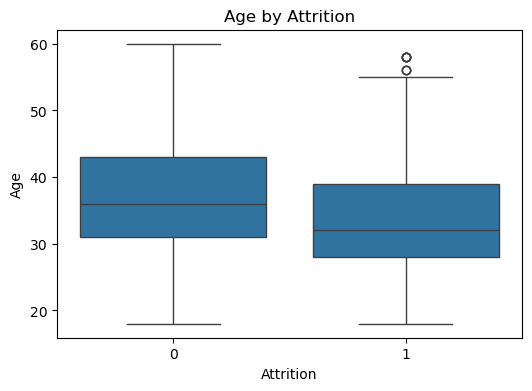

Age - T-test p-value: 0.0000


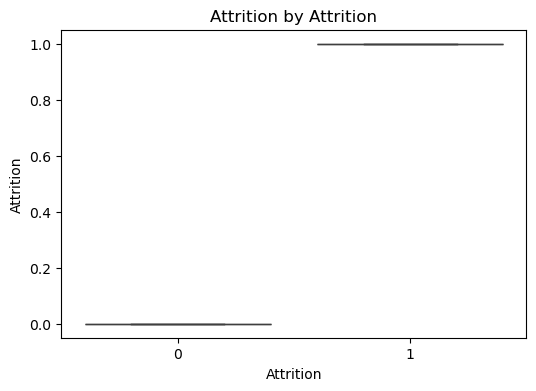

Attrition - T-test p-value: 0.0000


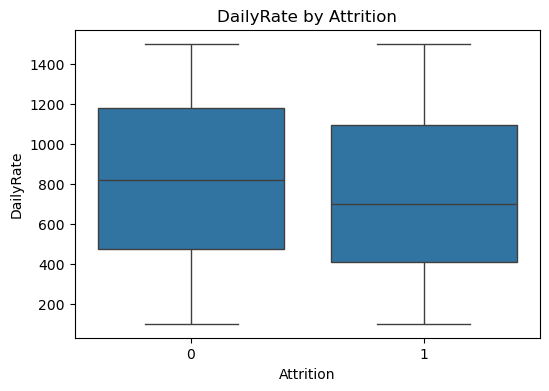

DailyRate - T-test p-value: 0.0300


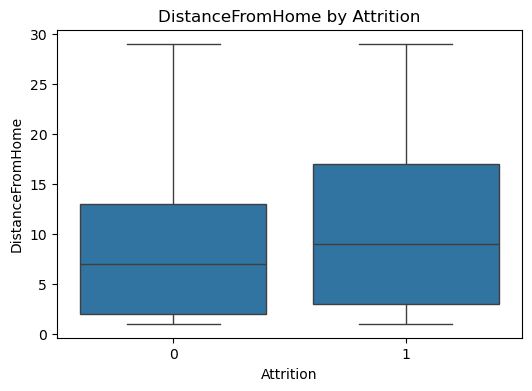

DistanceFromHome - T-test p-value: 0.0041


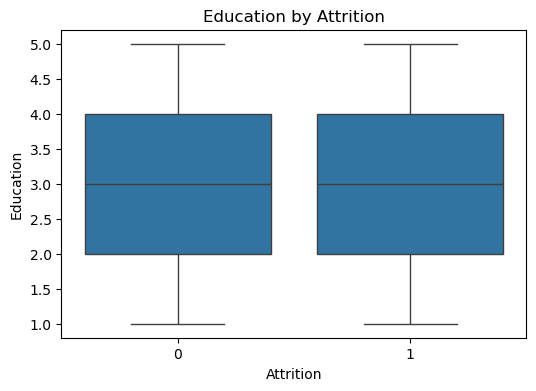

Education - T-test p-value: 0.2242


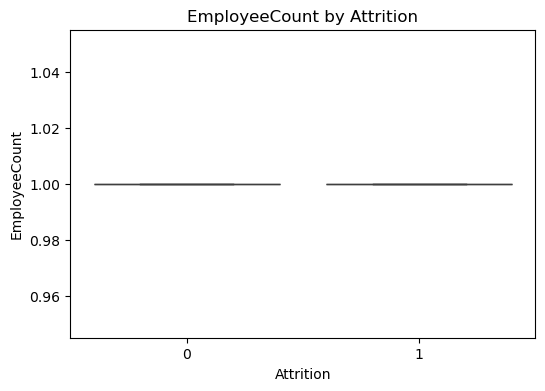

EmployeeCount - T-test p-value: nan


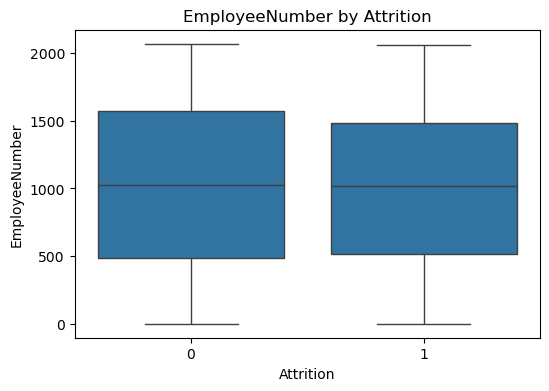

EmployeeNumber - T-test p-value: 0.6768


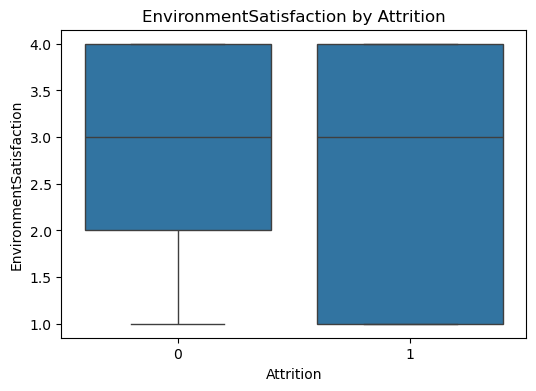

EnvironmentSatisfaction - T-test p-value: 0.0002


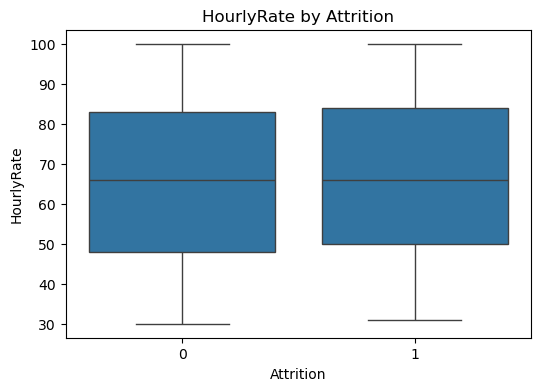

HourlyRate - T-test p-value: 0.7914


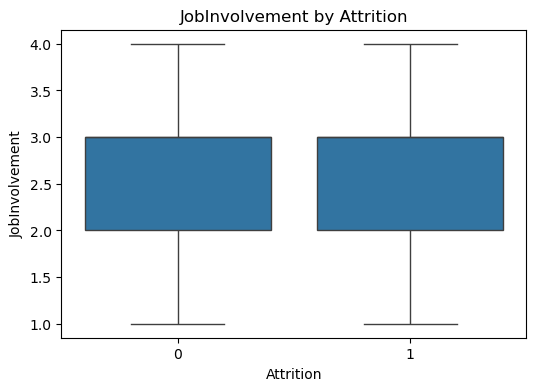

JobInvolvement - T-test p-value: 0.0000


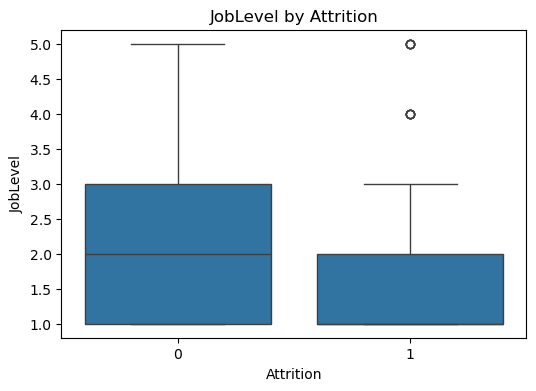

JobLevel - T-test p-value: 0.0000


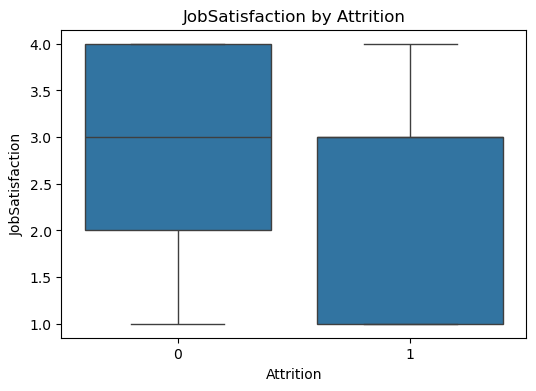

JobSatisfaction - T-test p-value: 0.0001


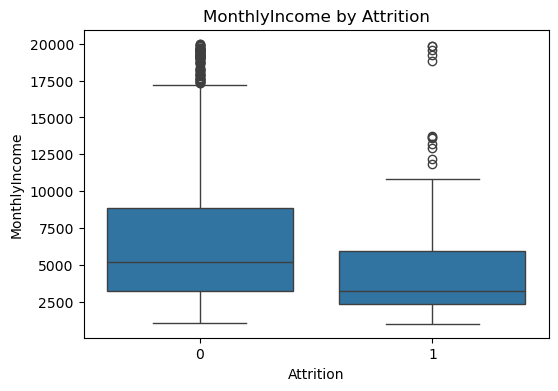

MonthlyIncome - T-test p-value: 0.0000


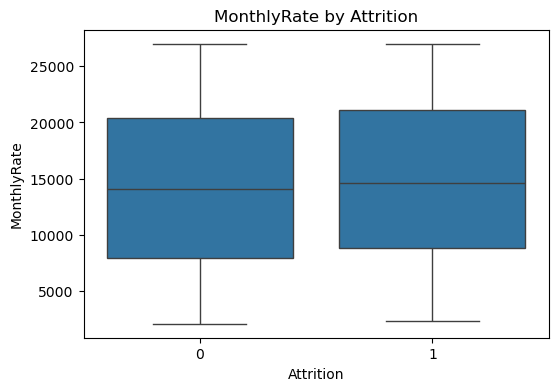

MonthlyRate - T-test p-value: 0.5653


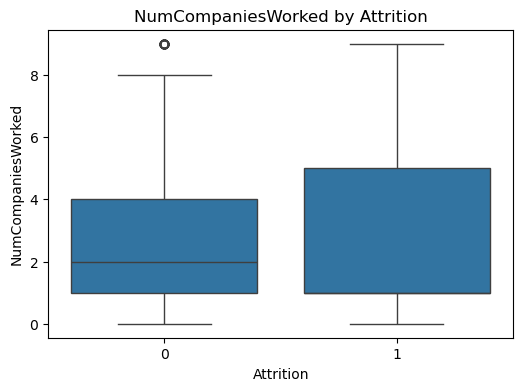

NumCompaniesWorked - T-test p-value: 0.1163


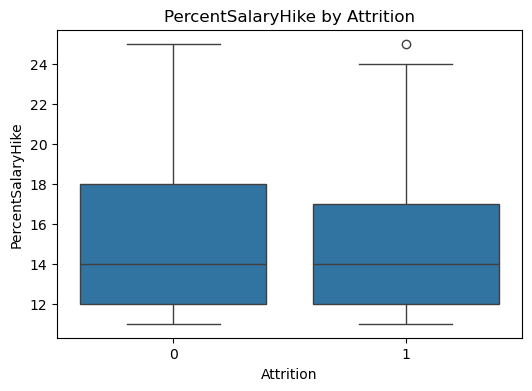

PercentSalaryHike - T-test p-value: 0.6144


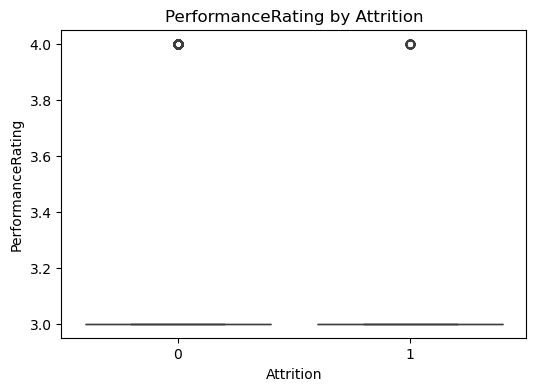

PerformanceRating - T-test p-value: 0.9125


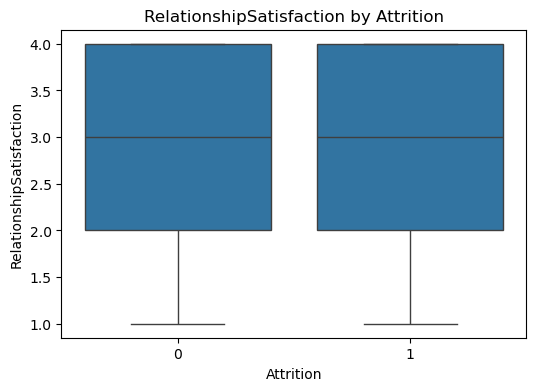

RelationshipSatisfaction - T-test p-value: 0.0897


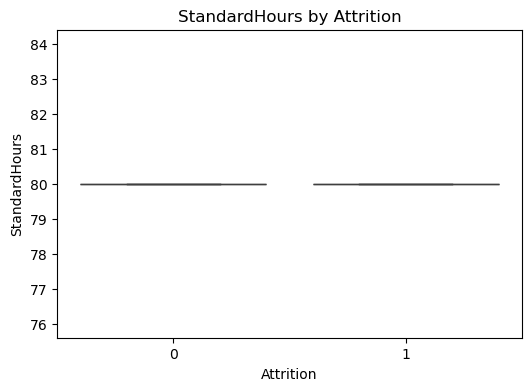

StandardHours - T-test p-value: nan


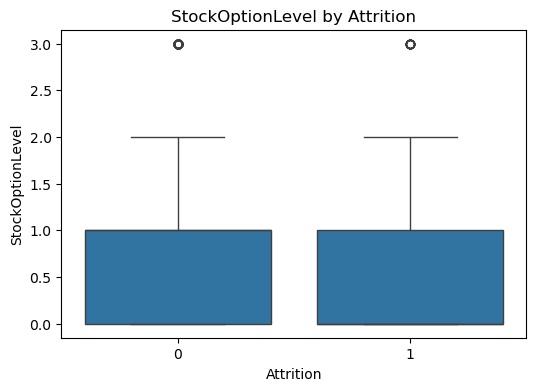

StockOptionLevel - T-test p-value: 0.0000


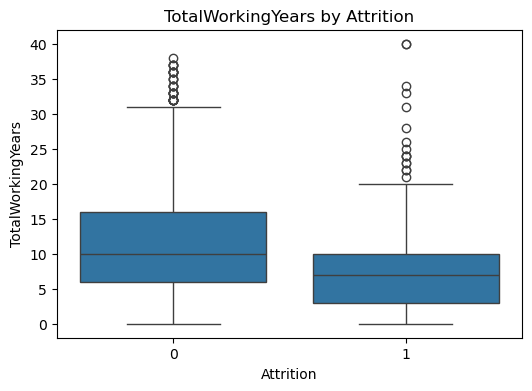

TotalWorkingYears - T-test p-value: 0.0000


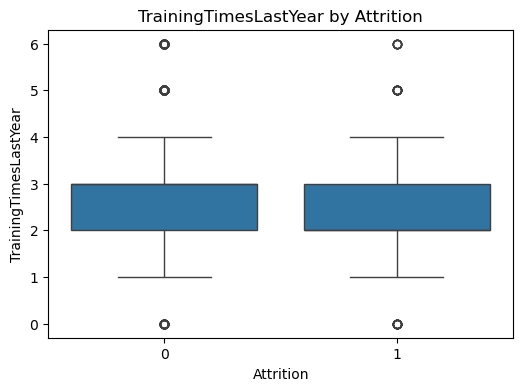

TrainingTimesLastYear - T-test p-value: 0.0204


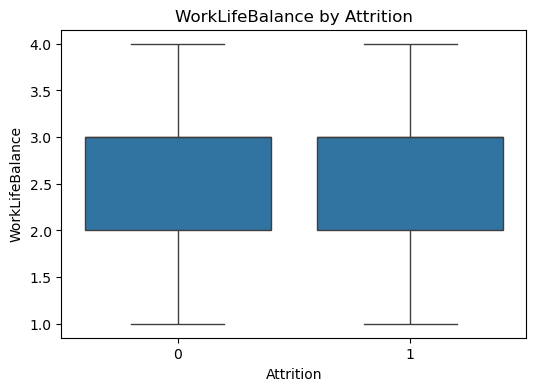

WorkLifeBalance - T-test p-value: 0.0305


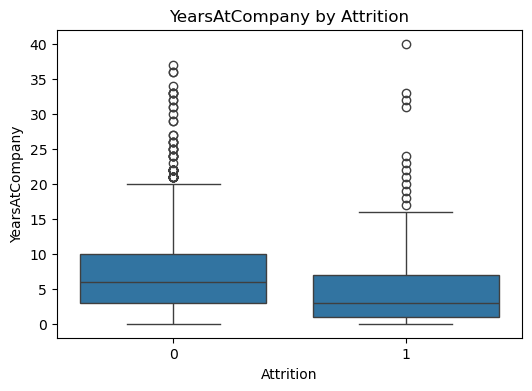

YearsAtCompany - T-test p-value: 0.0000


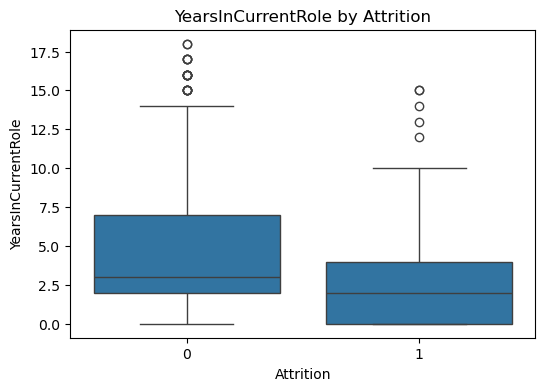

YearsInCurrentRole - T-test p-value: 0.0000


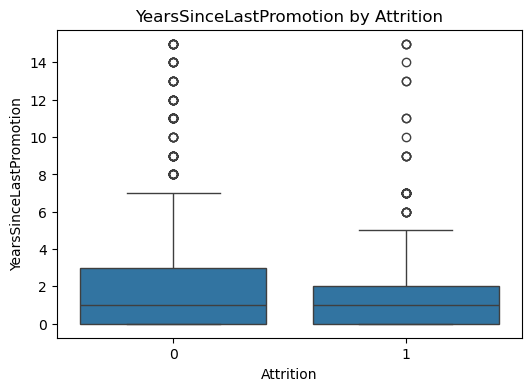

YearsSinceLastPromotion - T-test p-value: 0.1987


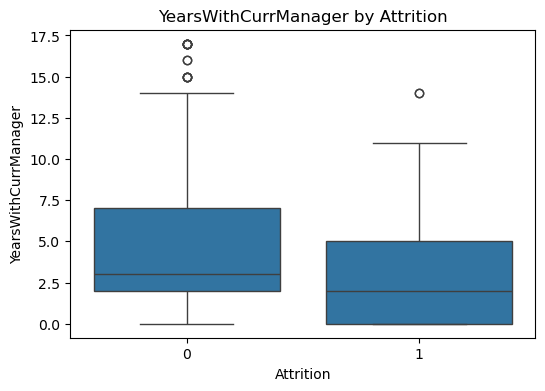

YearsWithCurrManager - T-test p-value: 0.0000


In [ ]:
for var in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Attrition", y=var, data=df)
    plt.title(f"{var} by Attrition")
    plt.show()

    # Statistical test
    group_yes = df[df["Attrition"] == 1][var]
    group_no = df[df["Attrition"] == 0][var]
    stat, p = ttest_ind(group_yes, group_no, equal_var=False)  # Welch’s t-test
    print(f"{var} - T-test p-value: {p:.4f}")